In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import caffe
import cv2
import detectobjects as det
import createdb as cdb
from convnet import ConvNetClassifier

In [3]:
opts = {'img_dir': '../data/images/',
        'model_dir': '../models/',
        'annotation_dir': '../data/annotation',
        'model': '2C-1FC-O',
        'threshold': 0.3, 
        'overlapThreshold': 0.3, 
        'lim': 0, 
        'prob': det.MAX, 
        'pos': det.MAX, 
        'gauss': 1,
        'mean': np.array([162.83]),
        'input_scale': None,
        'raw_scale': 255,
        'image_dims': (50,50),
        'channel_swap': None,
        'probs_area': 40,
        'step': 5
       }

net = ConvNetClassifier(opts)

trainfiles, valfiles, testfiles = cdb.create_sets(opts['img_dir'])

Detect objects within a test file

In [5]:
imfile = opts['img_dir'] + testfiles[0]
found = det.detect(imfile, net, opts)

Plot the detected objects

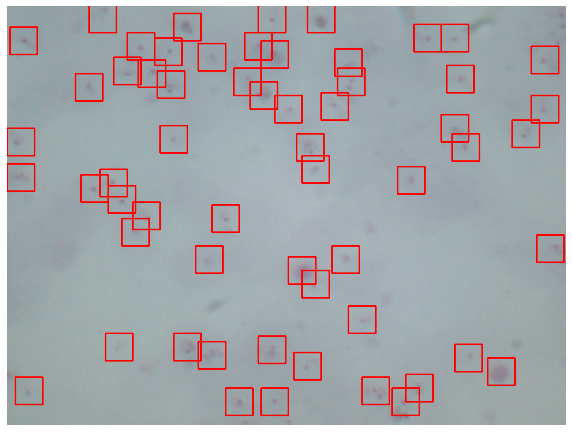

In [7]:
im = cv2.imread(imfile)

plt.box(False)
plt.xticks([])
plt.yticks([])

for f in found:
    f = f.astype(int)
    cv2.rectangle(im, (f[0], f[1]), (f[2],f[3]), (255,0,0), 2)
    
plt.gcf().set_size_inches(10,10)
plt.imshow(im)